In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning':0}) # prevents warning message for more than 20 image generation

#### 2. Data Preparation

a.

In [37]:
# the cleveland is chosen since it has been the one majorly used for machine learning training..
df = pd.read_csv('processed.cleveland.data', delimiter=',', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
                                   'oldpeak', 'slope', 'ca', 'thal', 'num']
display(df.columns) # names of variables or features
display(df.dtypes) # these are the different types of data types. There are float, object and int data types
df['num'] = np.where(df['num']>0, 1, 0) # replacing those values greater than 0 with 1. 0 signifies absence of heart disease
# while 1 signifies presence of heart disease

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

b.

In [38]:
# The 'ca' and 'thal' features are of object data type which should not be since 'ca' represents major number of vessels 
# which is a float data type while 'thal' represents thalassemia which also have all values to be of type float
# This means that this two features have varying data type

df_dtype = []
for val in df.columns: #creating a function to show the type consistency in the dataframe
    df_dtype.append((val, set([type(get_val) for get_val in df[val]])))
display(df_dtype)
# From the data display it shows that the features 'ca' and 'thal' are inconsistent with the rest since they are string

display(df.isna().sum()) # no value represented with nan...

[('age', {float}),
 ('sex', {float}),
 ('cp', {float}),
 ('trestbps', {float}),
 ('chol', {float}),
 ('fbs', {float}),
 ('restecg', {float}),
 ('thalach', {float}),
 ('exang', {float}),
 ('oldpeak', {float}),
 ('slope', {float}),
 ('ca', {str}),
 ('thal', {str}),
 ('num', {int})]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [39]:
for col in df.columns:
    for row in range(len(df)):
        try:
            df.loc[row, col] = float(df.loc[row, col])
        except ValueError:
            df.loc[row, col] = np.nan
# Those values that could not be converted to float were outrightly converted to nan
display(df.isna().sum()) # displaying nan values

# filling the missing values with the mean of the distribution
df['ca'] = df['ca'].fillna(df.ca.median()) #filling the missing values with the 'ca' median ensures that the values are discrete
df['thal'] = df['thal'].fillna(df.thal.median()) #filling the missing values with the 'ca' median ensures that the values 
# are discrete

display(df.isna().sum()) # no more nan values present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

[('age', 'There is no outlier'),
 ('sex', 'There is no outlier'),
 ('cp', 'There is outlier'),
 ('trestbps', 'There is outlier'),
 ('chol', 'There is outlier'),
 ('fbs', 'There is outlier'),
 ('restecg', 'There is no outlier'),
 ('thalach', 'There is outlier'),
 ('exang', 'There is no outlier'),
 ('oldpeak', 'There is outlier'),
 ('slope', 'There is no outlier'),
 ('ca', 'There is outlier'),
 ('thal', 'There is no outlier'),
 ('num', 'There is no outlier')]

[('age', 'There is no outlier'),
 ('sex', 'There is no outlier'),
 ('cp', 'There is outlier'),
 ('trestbps', 'There is no outlier'),
 ('chol', 'There is no outlier'),
 ('fbs', 'There is outlier'),
 ('restecg', 'There is no outlier'),
 ('thalach', 'There is no outlier'),
 ('exang', 'There is no outlier'),
 ('oldpeak', 'There is no outlier'),
 ('slope', 'There is no outlier'),
 ('ca', 'There is outlier'),
 ('thal', 'There is no outlier'),
 ('num', 'There is no outlier')]

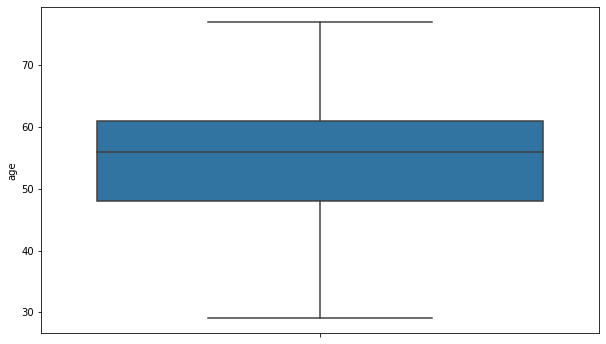

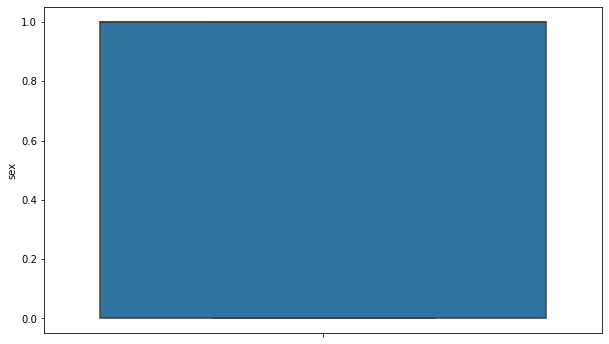

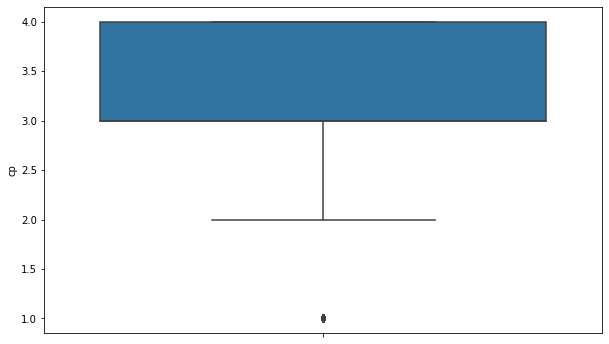

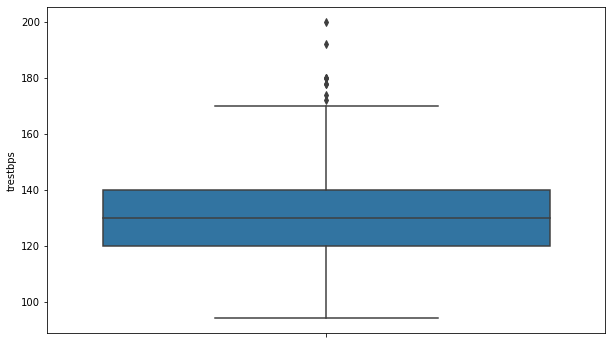

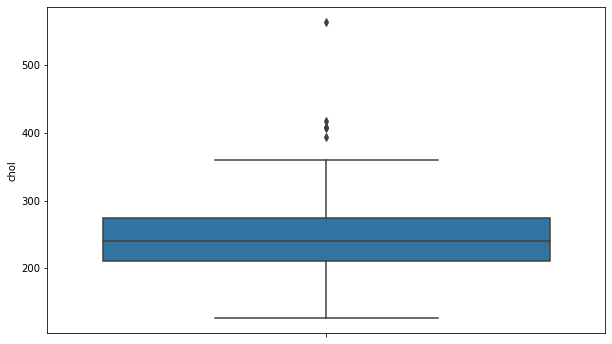

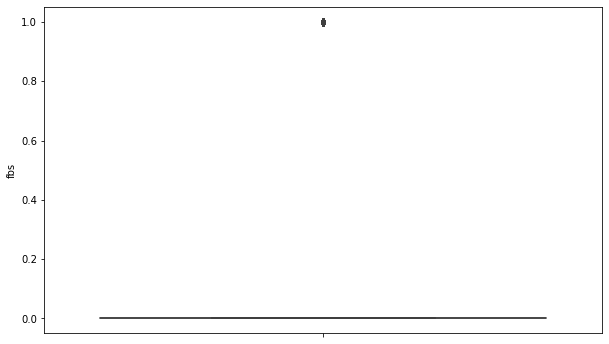

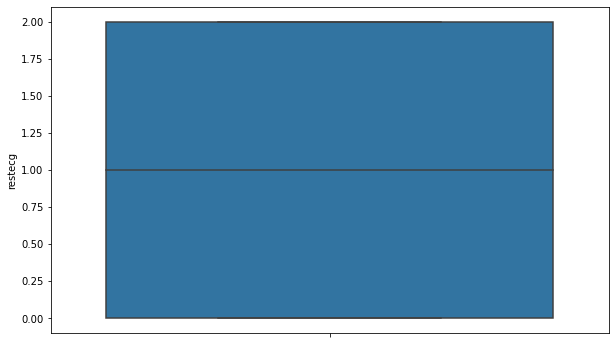

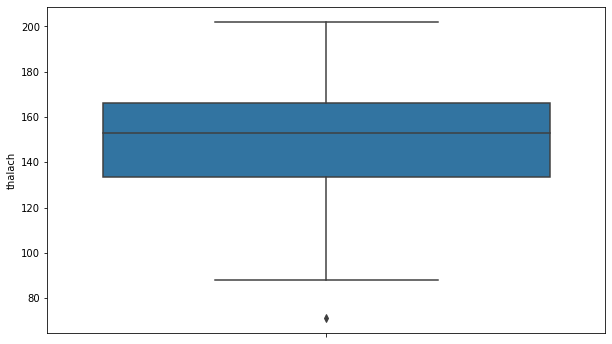

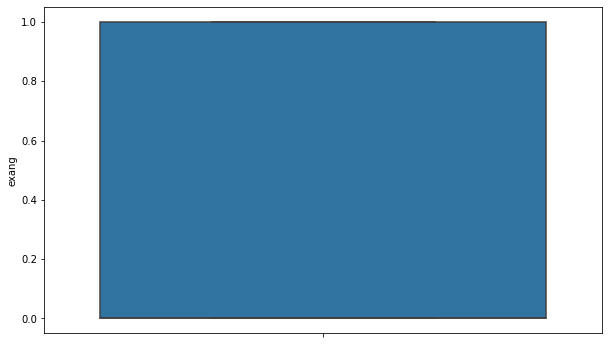

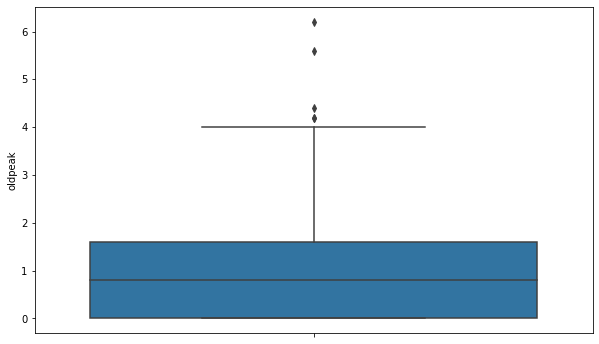

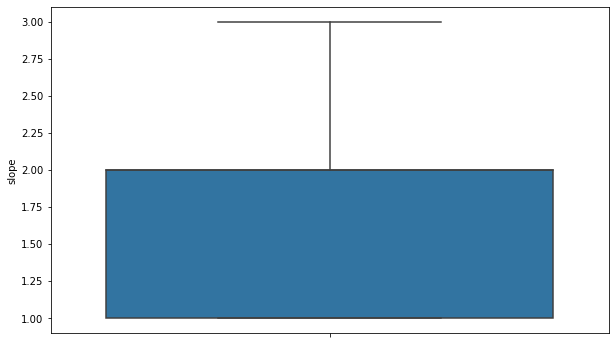

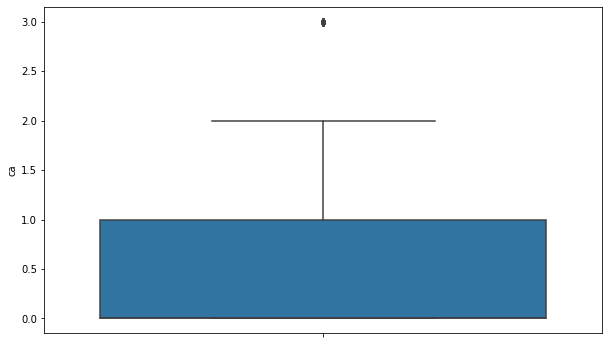

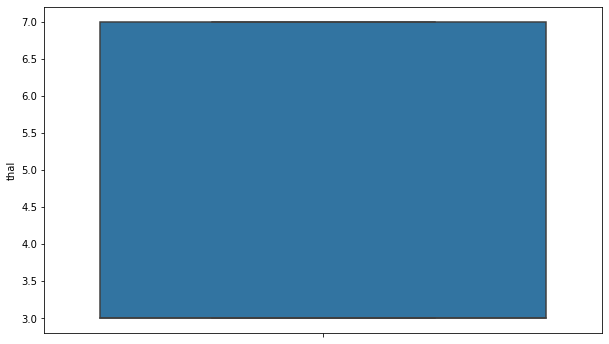

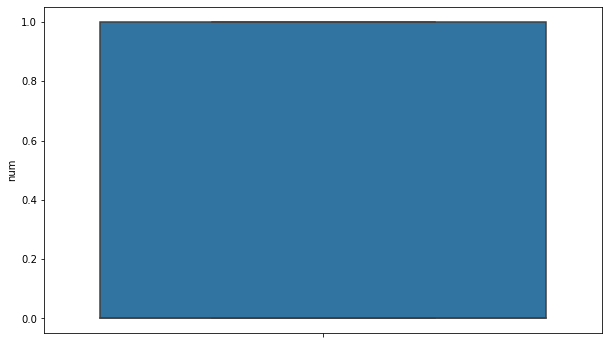

In [40]:
# carrying out the box plot to show the various outliers present
for val in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=val)
# from the plot the features that have outliers are 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca'
# but since removing the outliers for the discrete features will eliminate some classes completely...ca, cp, fbs are left untouched

# Establishing the formular for calculating the IQR
# IQR = Q3-Q1
# uppper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR

def check_outlier(df):
    outlier_features_check = list()
    for col in df.columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_bound = df[col].quantile(0.25) - 1.5*IQR
        upper_bound = df[col].quantile(0.75) + 1.5*IQR
        if sum(df[df[col] < lower_bound][col]) > 0 or sum(df[df[col] > upper_bound][col]) > 0:
            outlier_features_check.append((col, 'There is outlier'))
        else:
            outlier_features_check.append((col, 'There is no outlier'))
    return outlier_features_check
display(check_outlier(df))
# It implies that seven out of the fourteen features have outliers

# To replace the outliers those values less than the lower bound will be replaced by the minimum value greater than the lower  
# bound while those that are also greater than the upper bound will be replaced with the maximum value less than the upper bound
outlier_features = ['trestbps', 'chol', 'thalach', 'oldpeak'] # ca, fbs and cp features have been removed
def remove_outlier(df):
    for col in outlier_features:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_bound = df[col].quantile(0.25) - 1.5*IQR
        upper_bound = df[col].quantile(0.75) + 1.5*IQR
        for row in range(len(df)):
            df.loc[row, col] = np.where(df.loc[row, col]<lower_bound, df[df[col] > lower_bound][col].min(), df.loc[row, col])
            df.loc[row, col] = np.where(df.loc[row, col]>upper_bound, df[df[col] < upper_bound][col].max(), df.loc[row, col])
remove_outlier(df) # This removes the outliers successfully
display(check_outlier(df)) # the only outlier present is those of ca, fbs and cp features which were not removed

#### 3. Model Planning

#### a.

##### i. finding the statistical summaries

In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.19802,245.402640,0.148515,0.990099,149.663366,0.326733,1.021122,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,16.32129,47.097014,0.356198,0.994971,22.701756,0.469794,1.101511,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.00000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.00000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.00000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.00000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,170.00000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,1.000000


##### ii. Univariate Plot

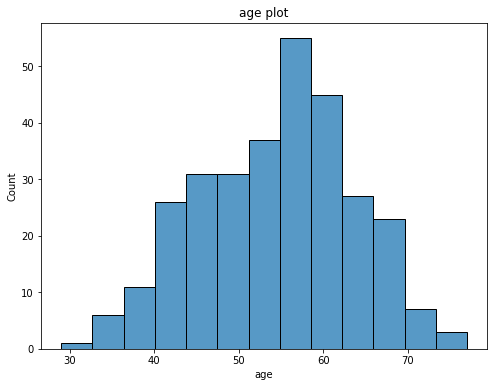

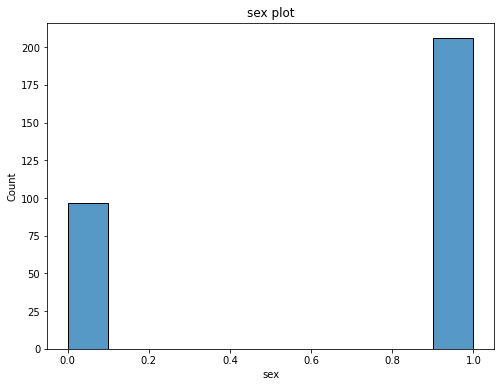

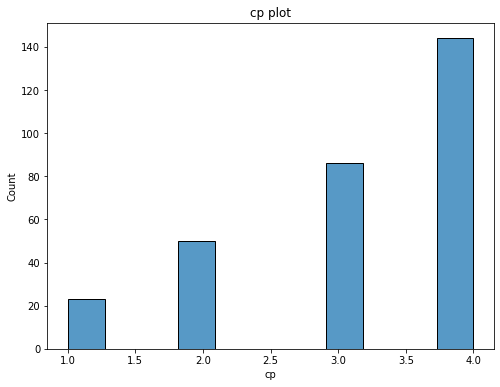

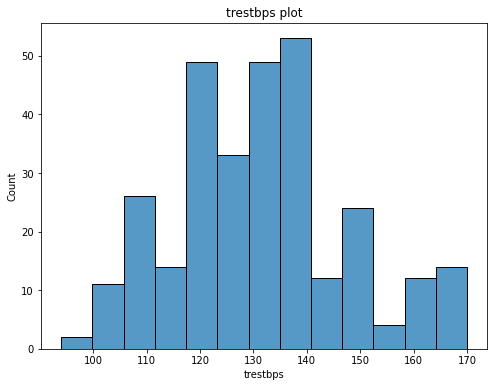

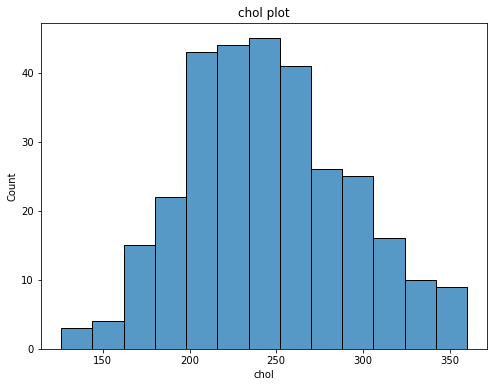

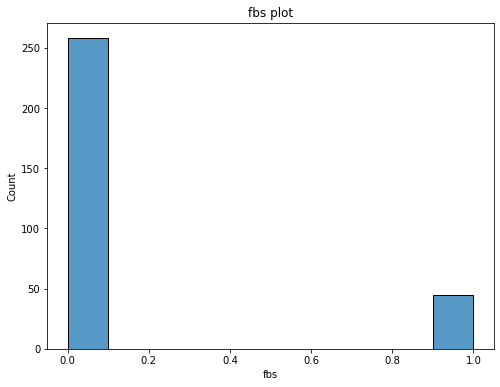

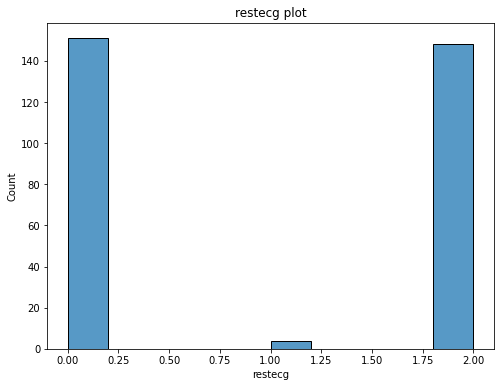

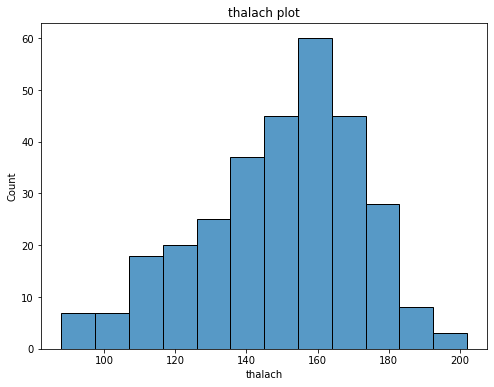

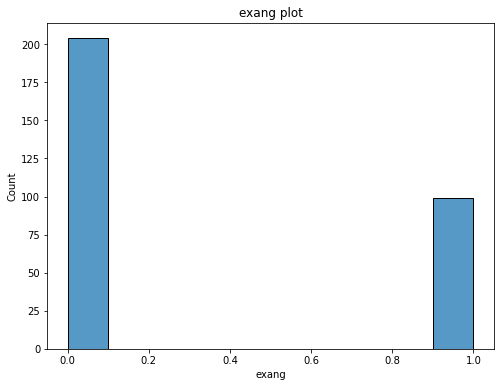

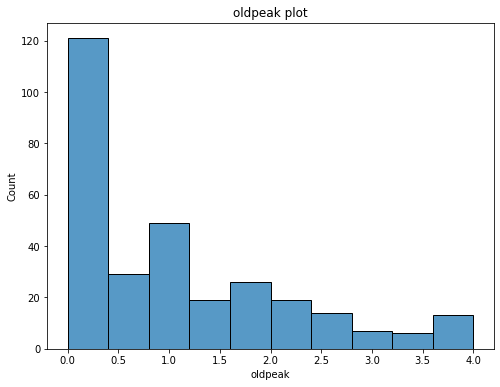

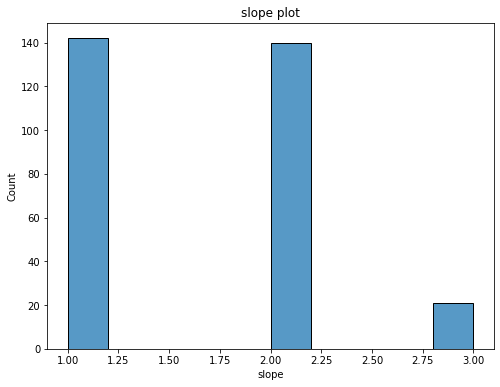

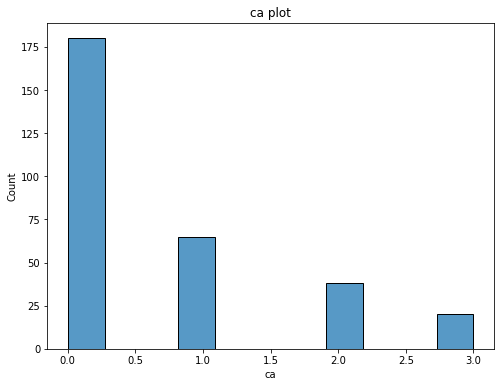

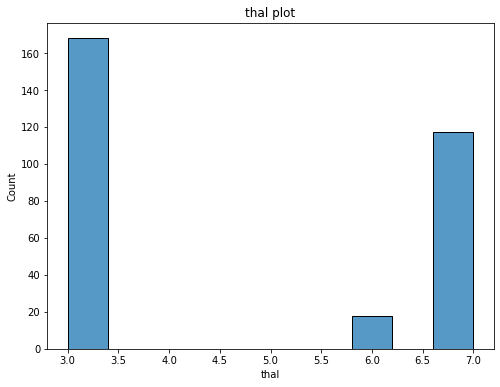

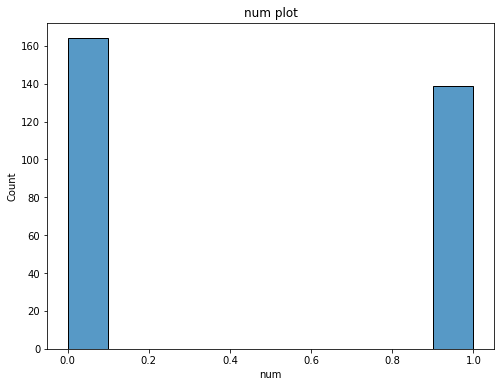

In [42]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col) # making a histogram plot for each of the features
    plt.title(f'{col} plot')

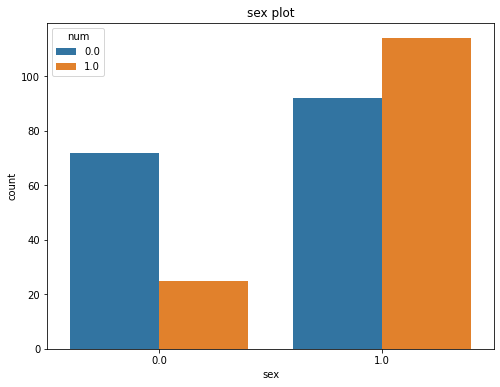

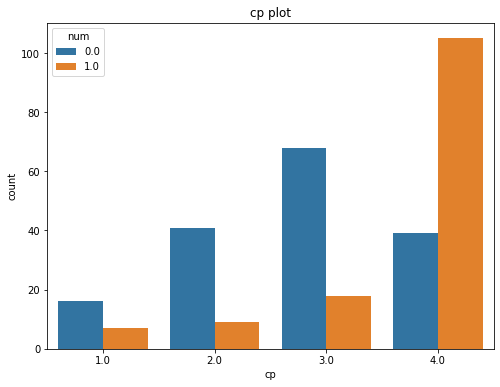

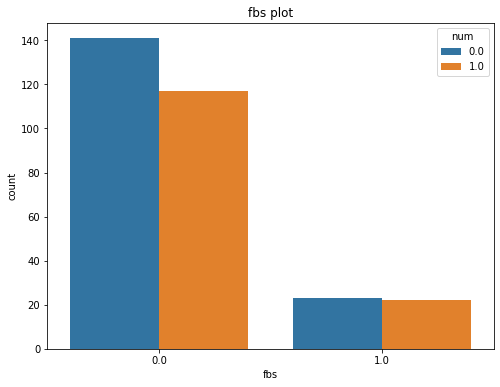

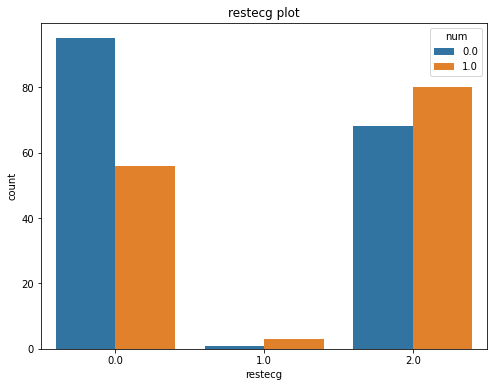

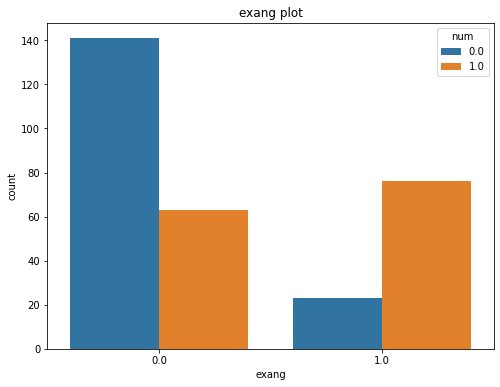

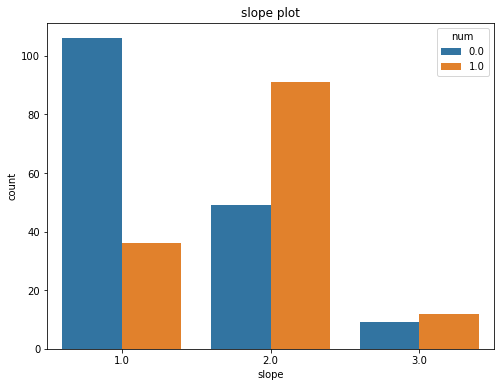

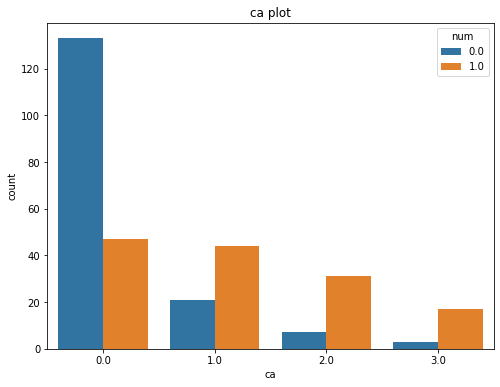

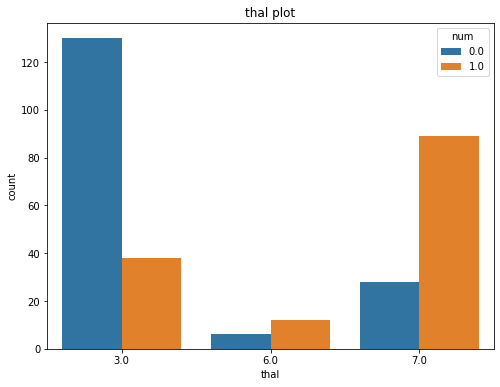

In [43]:
# making univariate plot for discrete variable showing how they affect the num features(whether a person has heart disease or not)
discrete_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
for col in discrete_col:
    if col != 'num':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col, hue='num') # making a histogram plot for each of the features
        plt.title(f'{col} plot')

Lower limit of age is 52.0 while the upper limit is 62.0
Lower limit of trestbps is 120.0 while the upper limit is 145.0
Lower limit of chol is 217.5 while the upper limit is 283.5
Lower limit of thalach is 125.0 while the upper limit is 156.5
Lower limit of oldpeak is 0.55 while the upper limit is 2.5


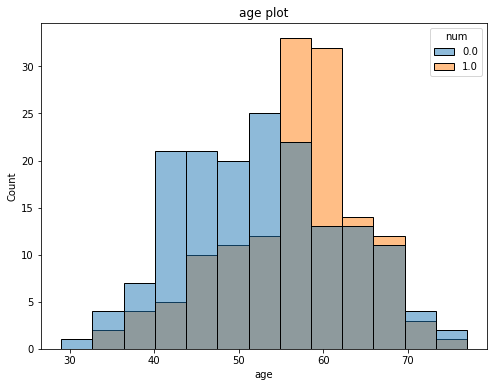

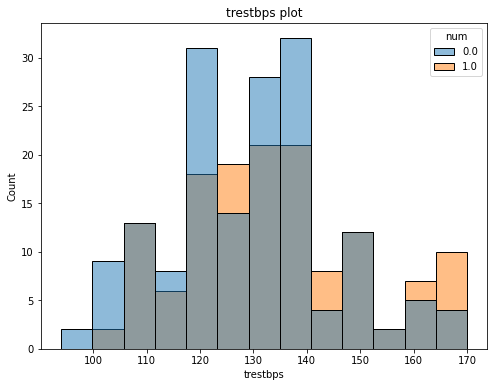

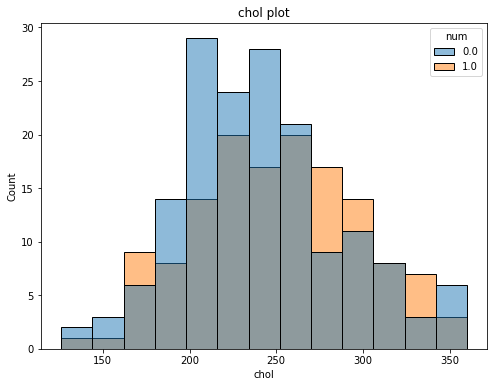

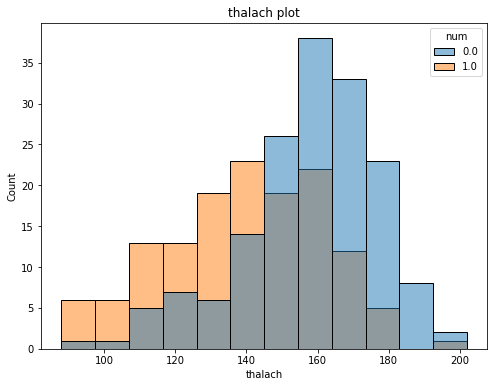

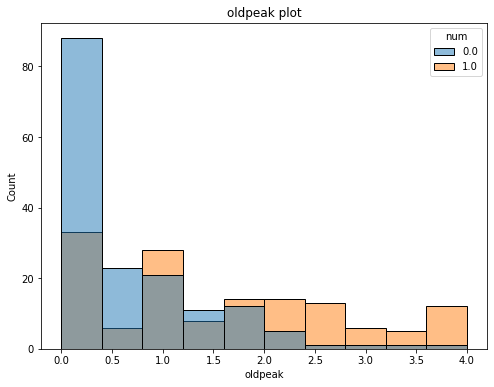

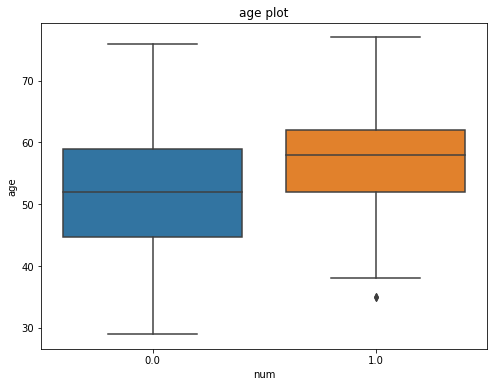

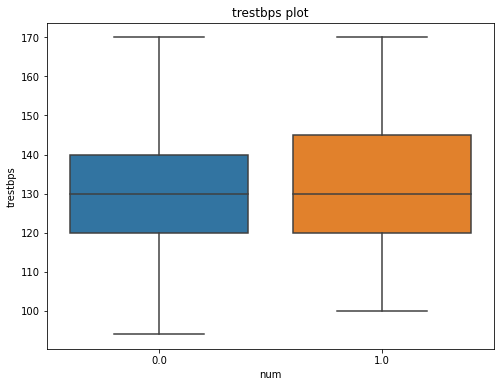

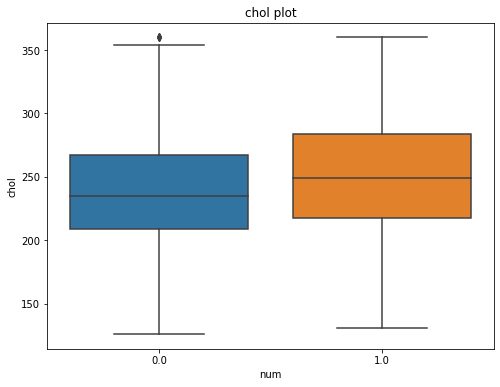

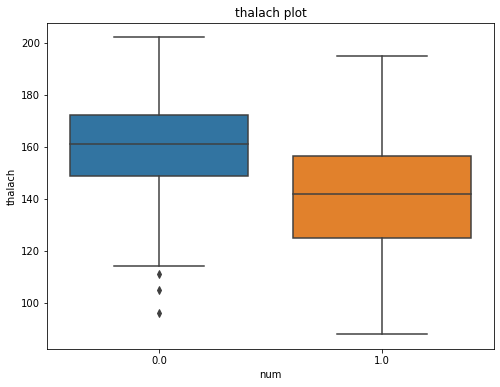

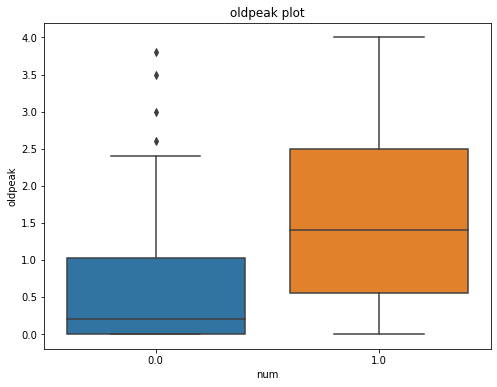

In [44]:
# making univariate plot for continuous variable showing the range that has heart disease or not using histogram
continuous_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for continuous in continuous_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(df, x=continuous, hue='num')
    plt.title(f"{continuous} plot")

 
# making univariate plot for continuous variable showing the range that has heart disease or not using boxplot   
for continuous in continuous_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df, y=continuous, x='num')
    plt.title(f"{continuous} plot")

    
quantile_list = list()
for col in continuous_col:
    lower_limit = df[df['num']==1][col].quantile(0.25)
    upper_limit = df[df['num']==1][col].quantile(0.75)
    quantile_list.append((col, lower_limit, upper_limit))
    print(f"Lower limit of {col} is {lower_limit} while the upper limit is {upper_limit}")

##### iii. Bivariate Plot

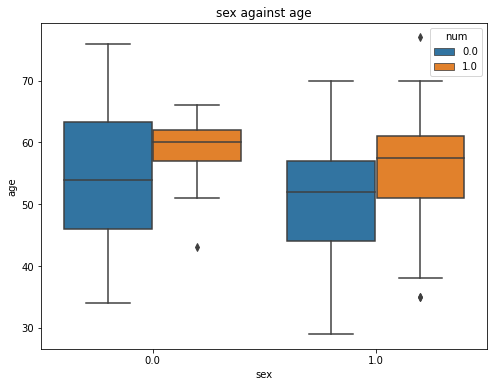

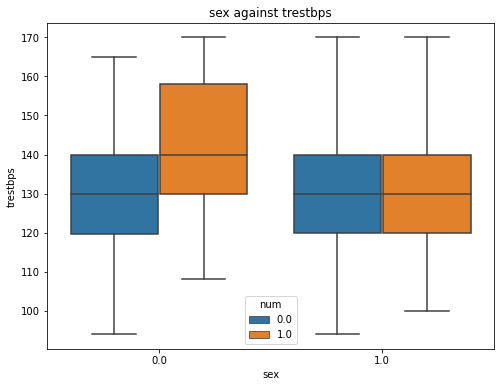

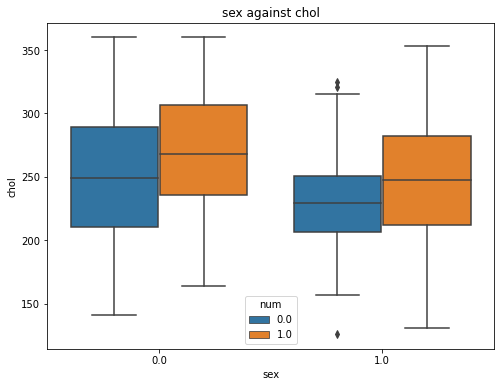

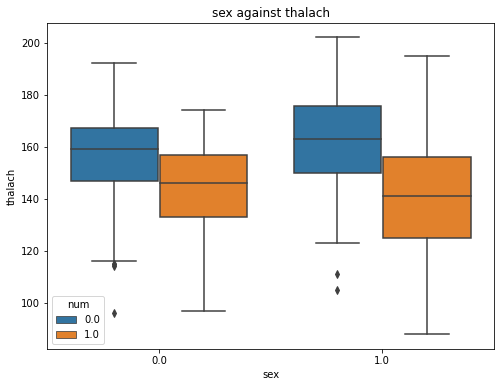

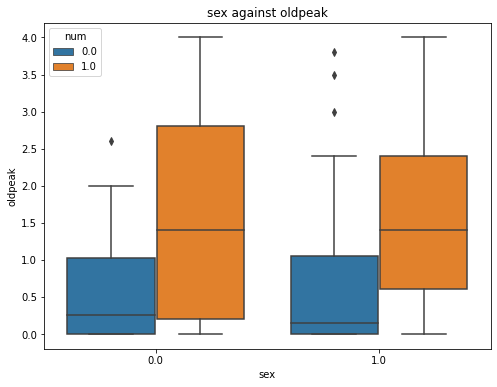

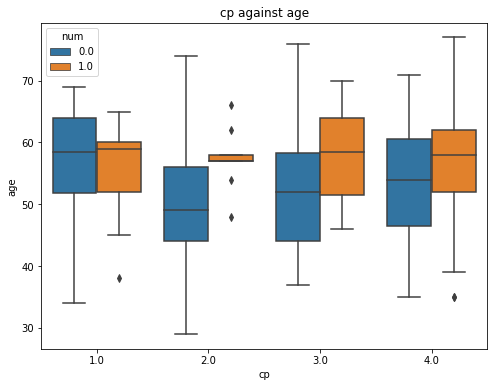

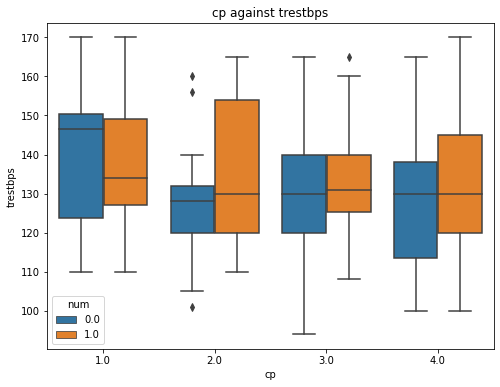

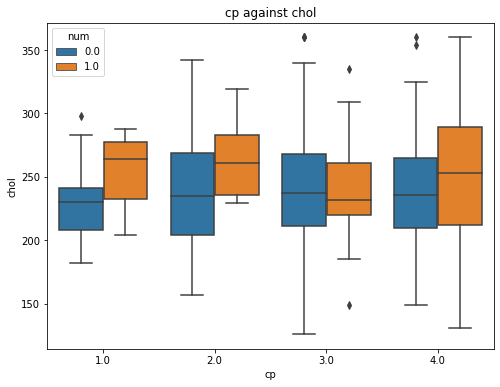

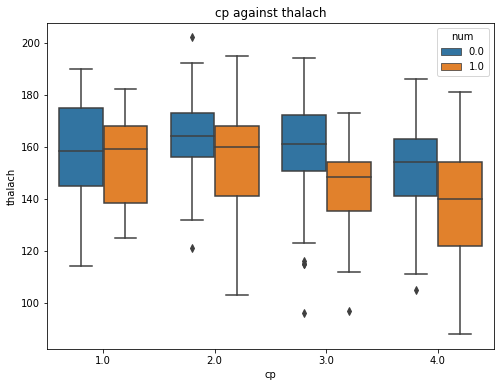

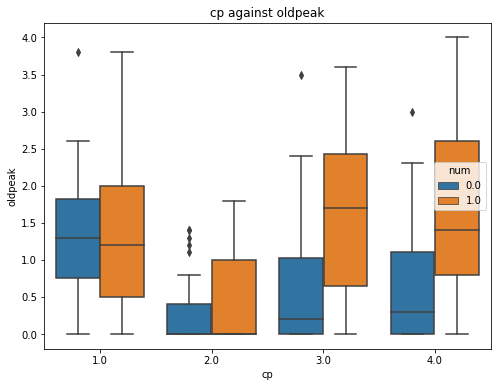

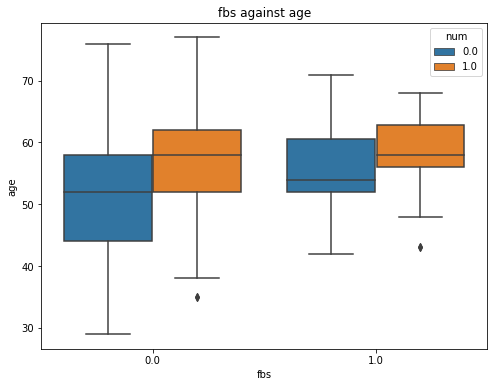

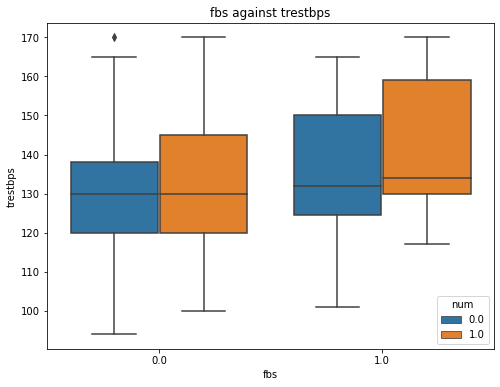

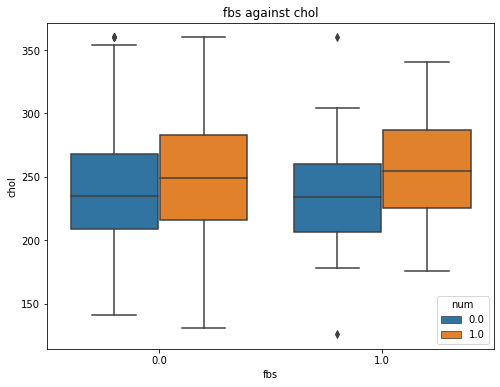

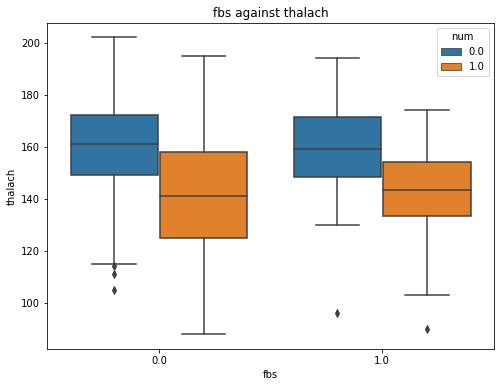

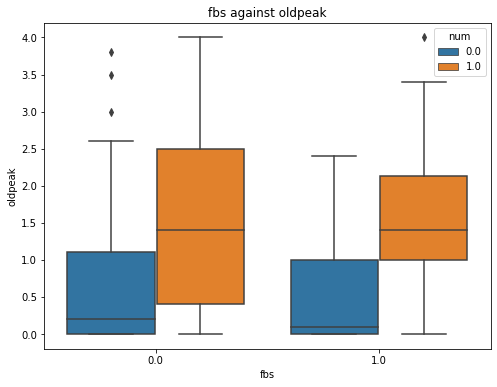

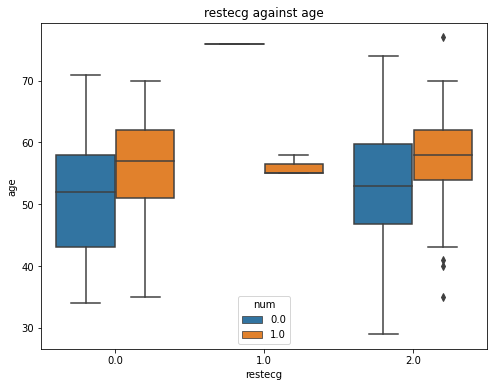

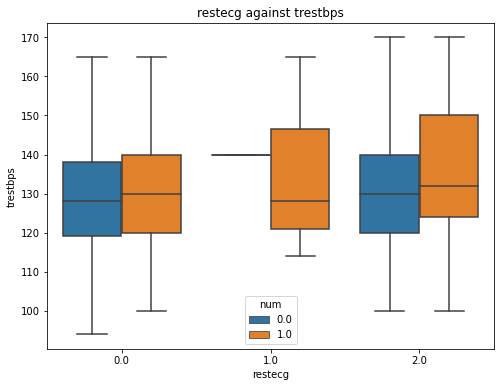

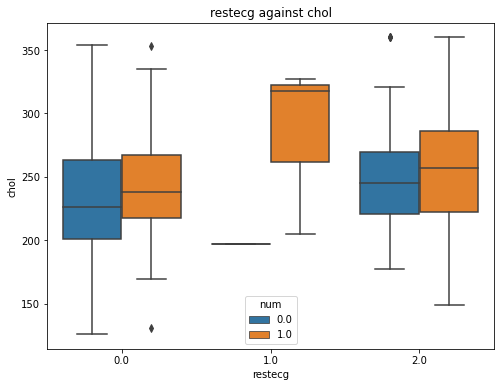

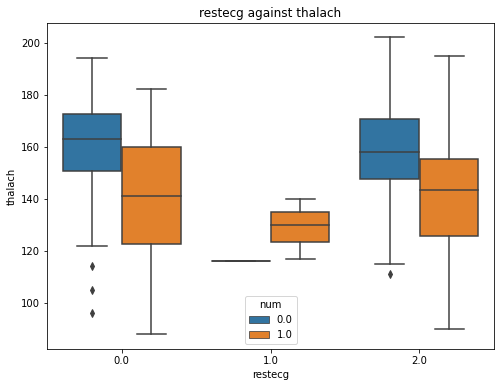

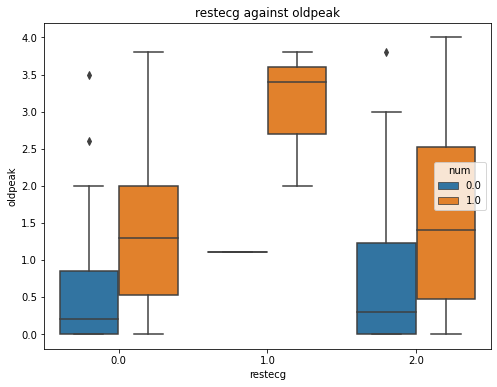

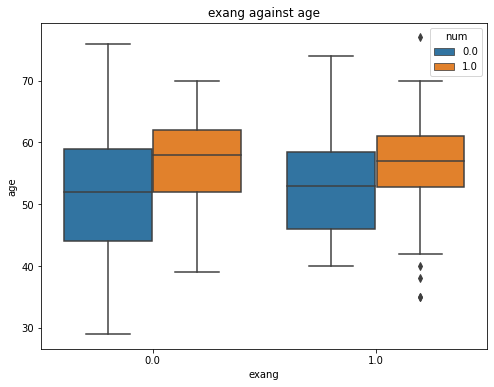

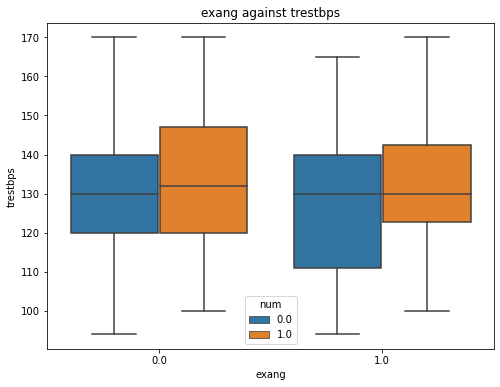

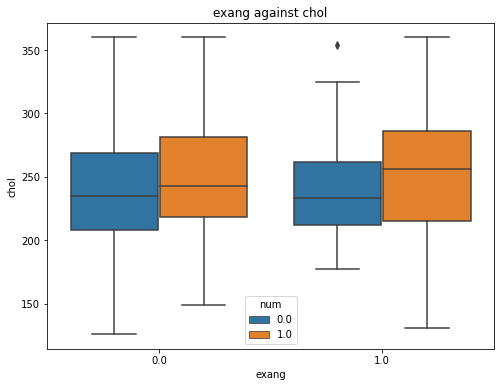

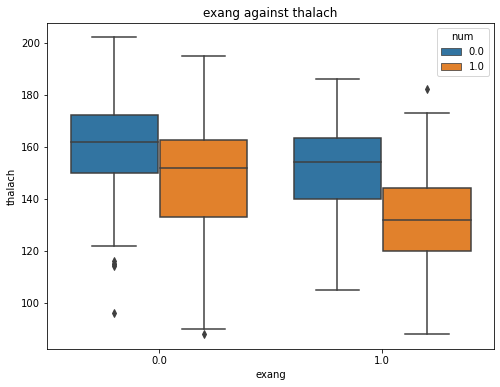

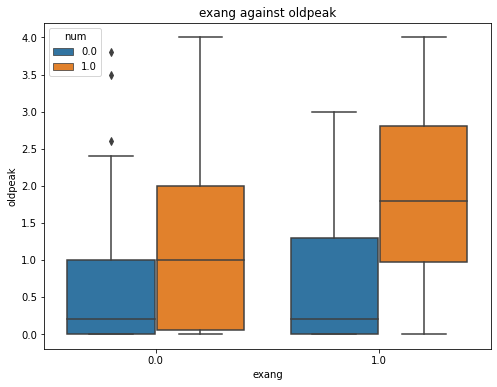

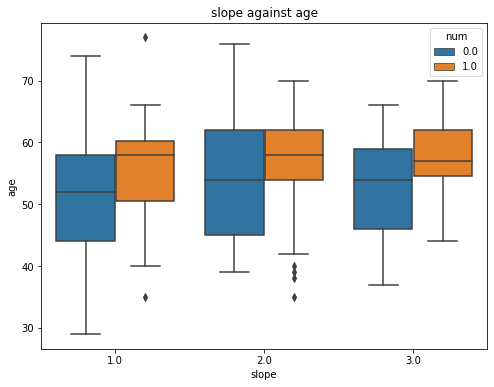

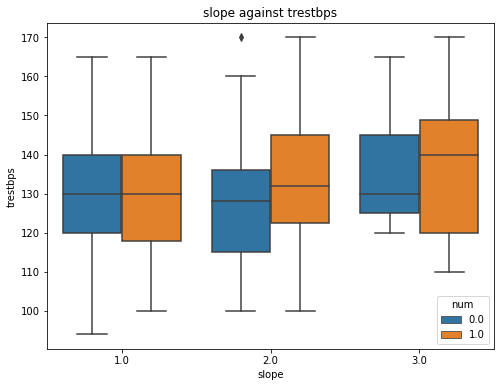

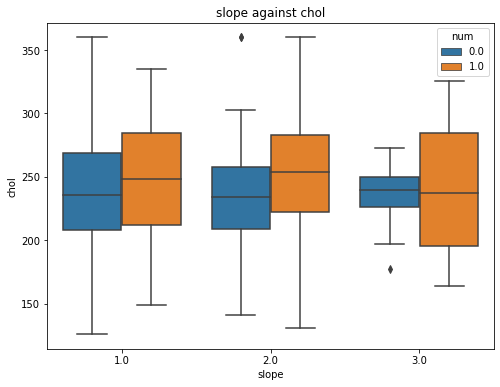

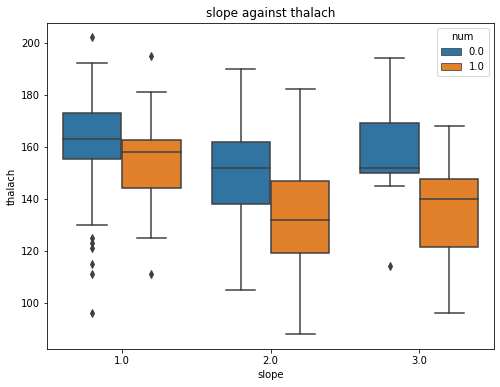

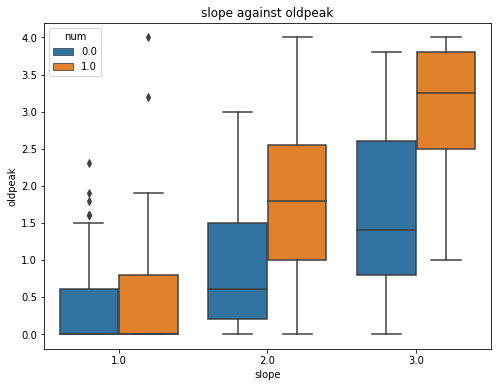

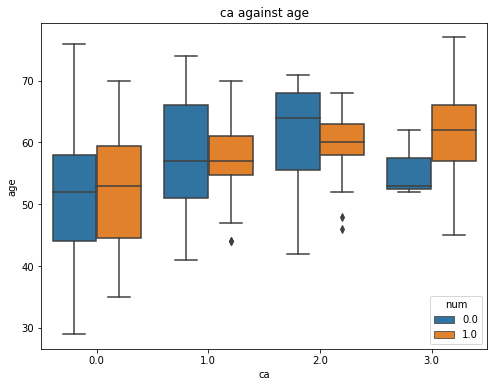

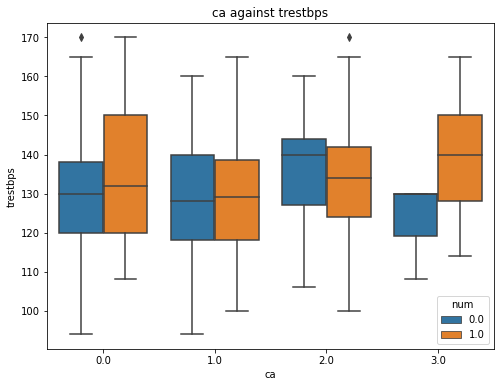

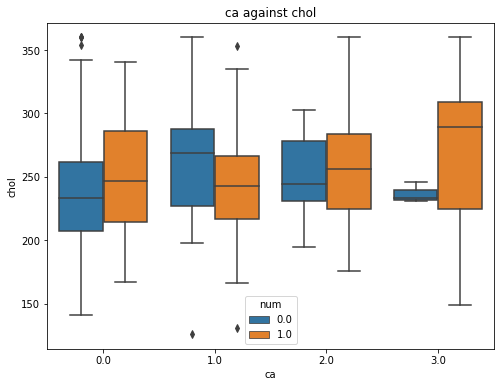

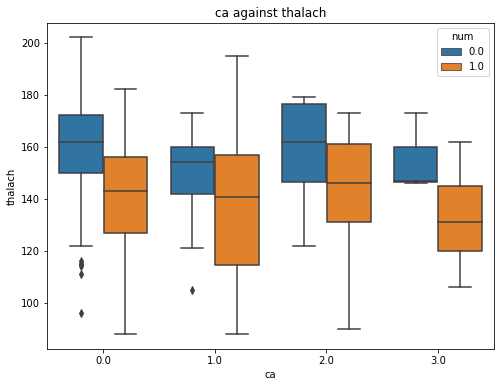

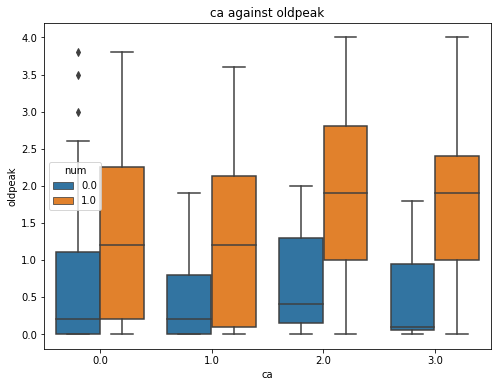

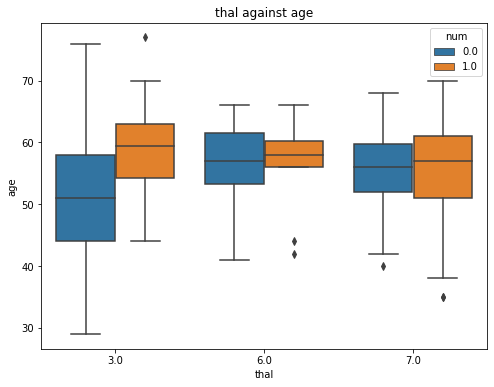

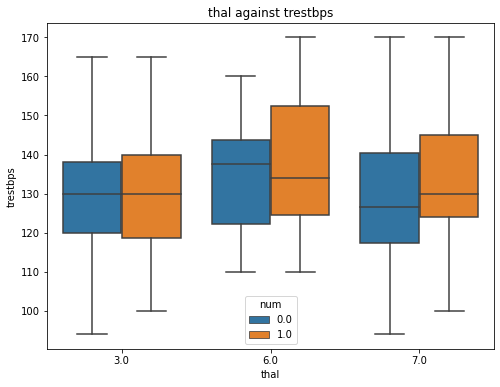

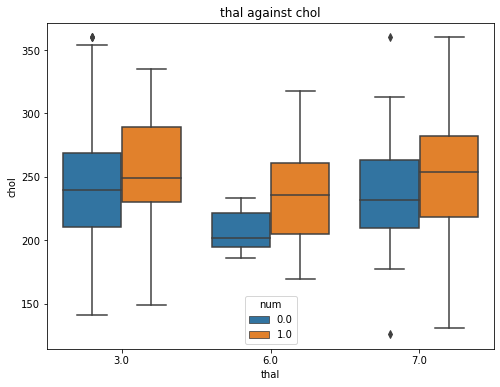

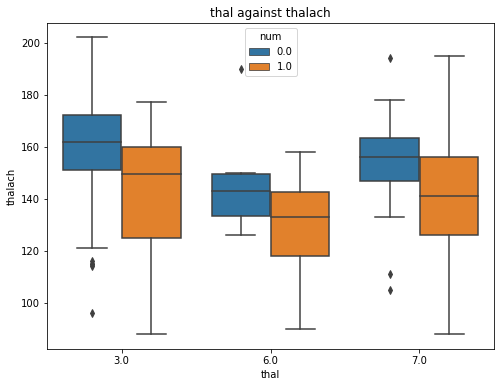

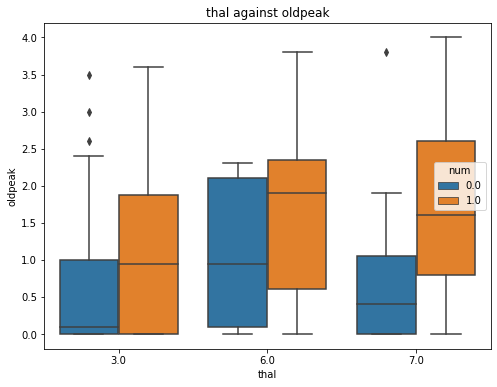

In [12]:
for col1 in discrete_col:
    for col2 in continuous_col:
        if col1 != col2 and col1 != 'num':
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df, x=col1, y=col2, hue='num')
            plt.title(f'{col1} against {col2}')

#####  iv. Portraying Advanced Graphs

In [45]:
# For making plots of more than two dimensions the principal components of the data is found...then the principal components can
# be plotted against each other.
pca_input_columns = df.drop('num', axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model

principalComponents = pca.fit_transform(df) # transforms the two components
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,pca1,pca2
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,11.260547,2.841211
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0,-43.083986,44.801216
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,16.227995,21.927590
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,-3.386434,-39.883742
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,42.165460,-23.468835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0,-17.176523,13.153758
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0,50.906821,13.492421
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0,113.698574,37.038738
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0,9.608317,-23.293334


In [46]:
pca1_coefficients, pca2_coefficients = np.round(abs(pca.components_[0]), 4), np.round(abs(pca.components_[1]), 4)
pd.DataFrame.from_records(list(zip(pca_input_columns, pca1_coefficients, pca2_coefficients)), columns=['features', 'pca1', 'pca2'])

,features,pca1,pca2
0,age,0.0410,0.1801
1,sex,0.0018,0.0009
2,cp,0.0015,0.0135
3,trestbps,0.0555,0.0947
4,chol,0.9975,0.0236
5,fbs,0.0001,0.0004
6,restecg,0.0035,0.0042
7,thalach,0.0111,0.9780
8,exang,0.0008,0.0076
9,oldpeak,0.0012,0.0174


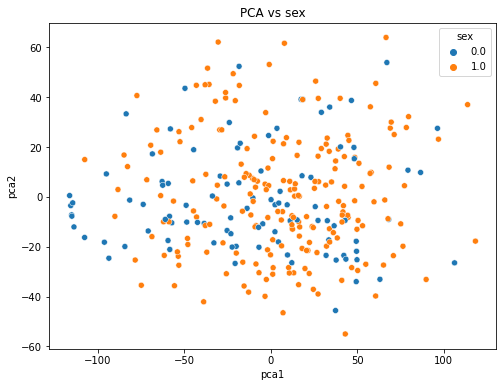

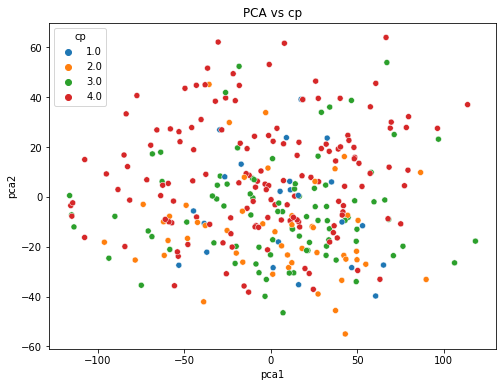

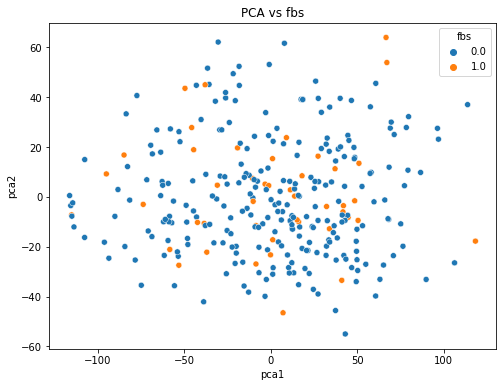

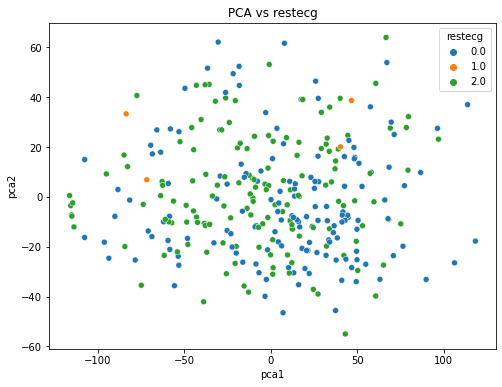

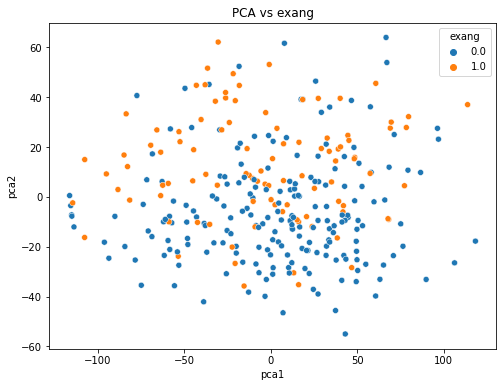

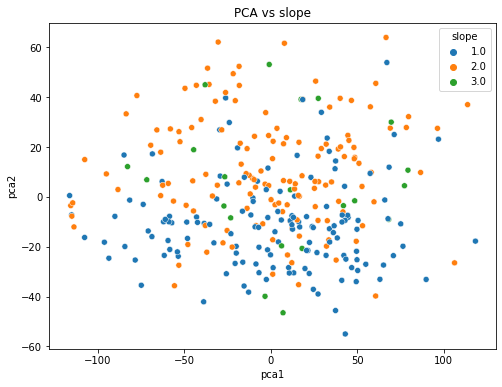

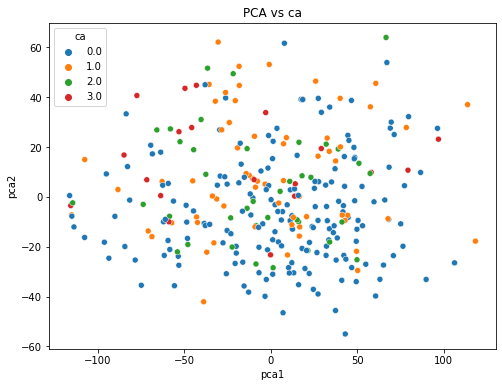

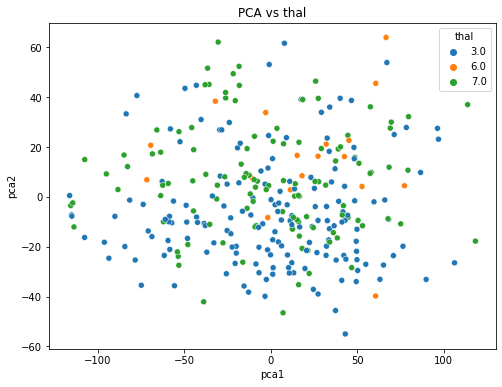

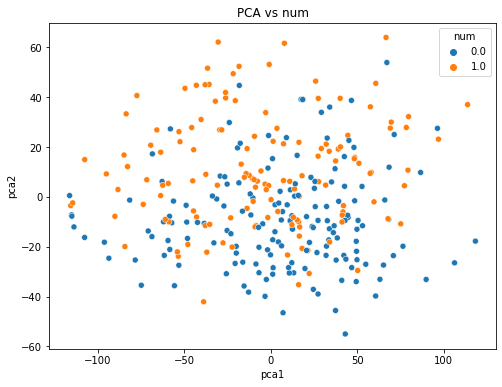

In [47]:
# plotting the various principal component analysis against the various features 
for col in discrete_col:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='pca1', y='pca2',hue=col, data=df, palette='tab10')
    plt.title(f'PCA vs {col}')

##### v. Relationship between variables

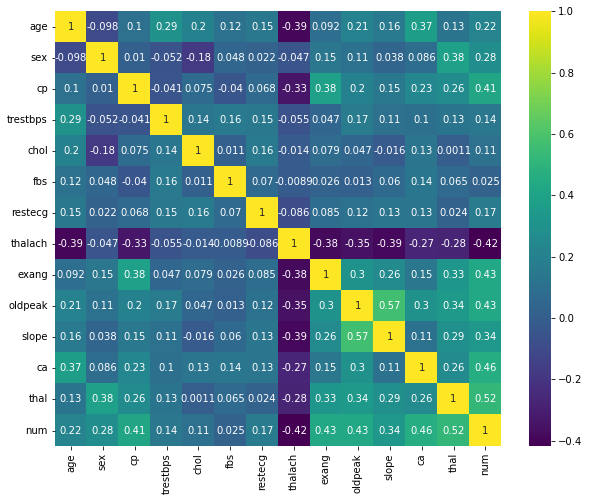

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='viridis'); # This shows the correlation between two variables

#### b. summarize your findings

In [49]:
# 1. The number of male that have heart disease is about five times that of the female
# 2. Asymptomatic type of chest pain caused more heart disease while those with typical anginal chest pain had the least heart
# disease
# 3. Fasting blood sugar (fbs) less than 120 mg/dl caused more heart disease than those greater than 120 mg/dl
# 4. restecg with value 2 has the highest number of heart disease while those with  1 has the least
# 5. No significant difference between the two values of exang that causes heart disease while the exang of value one caused 
# much more lesser heart disease
# 6. Flat slope caused more heart disease while downsloping slope caused less heart disease
# 7. Patients with 0 and 1 vessels had more heart disease than those with 3 and 4; and also a large number of those with 0 
# vessels  did not have heart disease 
# 8. Patients with a thal value of 7 has the highest number of heart disease while those with 3(normal) has the highest number of
# patients without heart disease
# 9. Patients in the age range of 52-62 had more heart disease than others
# 10. Patients with resting blood pressure (trestbps) in the range of 120-145 has more heart disease than others
# 11. Patients with serum cholesterol(chol) of values in the range of 217.5-283.5 has more heart disease than others
# 12. Patients with maximum heart rate (thalach) in range of 125-156.5 has more heart disease than others
# 13. Patients with oldpeak in range of 0.55-2.5 has more heart disease than others
# 14. Features chol and thalach are the two most important features from the PCA analysis
# 15. From the heatmap thalach and num are highly negatively correlated while thal and num are highly positively correlated

The modelling technique to be used is classification model. This is because the target variable which is 'num' is a 
discrete value. Classification models are used when the target variable is either a discrete variable or categorical variable

#### 4. Model Building

#### a.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
df = df.drop(['pca1', 'pca2'], axis=1)

In [52]:
df = df.copy() # creating a copy of the dataframe to avoid running of the cells from start

In [53]:
X = df.drop('num', axis=1)
y = df['num']

# train_test_split helps split my data into a ratio of 70 to 30 for training and testing respectively..The stratify ensures that
# the splitting caters for the target feature that has imbalanced class representation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler() # normalizing my data so that it has a mean of 0 and a standard devaition of 1..This is necessary since
# the features have various units
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###### Logistic Regression

In [54]:
cv = StratifiedKFold(n_splits=5)
param = {'C':[1, 5, 10, 20, 50, 100], 'penalty':['l1','l2'], 'solver':['lbfgs', 'liblinear']}
log_reg = LogisticRegression(random_state=42)
# GridSearchCV tries out various values passed for the hyperparameters and outputs the one with the highest accuracy
Gridcv_logreg = GridSearchCV(estimator = log_reg, param_grid=param, cv=cv, scoring='accuracy')
Gridcv_logreg.fit(X_train_scaled, y_train)

C:\Users\cali\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cali\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\cali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueEr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 5, 10, 20, 50, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [55]:
print(f"The best parameters are {Gridcv_logreg.best_params_}") # prints the best parameter to be used for the logistic regression model

# prints the best score based on the 'accuracy' scoring
print(f"The accuracy of the selected parameters give an accuracy of {np.round(Gridcv_logreg.best_score_*100,4)} %")  

The best parameters are {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
The accuracy of the selected parameters give an accuracy of 82.5138 %


In [56]:
logreg_pred = Gridcv_logreg.predict(X_test_scaled)
logreg_pred

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0.])

###### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
cv = StratifiedKFold(n_splits=5)
param = {'criterion':['gini', 'entropy'], 'max_depth':list(np.arange(1, 10)), 'max_features':["auto", "sqrt", "log2", None],
    'min_samples_leaf':list(np.arange(1, 5)), 'max_leaf_nodes':[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}
dtree = DecisionTreeClassifier(random_state=42)
# GridSearchCV tries out various values passed for the hyperparameters and outputs the one with the highest accuracy
Gridcv_dtree = GridSearchCV(estimator = dtree, param_grid=param, cv=cv, scoring='accuracy')
Gridcv_dtree.fit(X_train, y_train) # X_train is used since decision tree does not require normalization

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [2, 4, 8, 16, 32, 64, 128, 256, 512,
                                            1024],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='accuracy')

In [59]:
print(f"The best parameters are {Gridcv_dtree.best_params_}") # prints the best parameter to be used for the logistic regression model

# prints the best score based on the 'accuracy' scoring
print(f"The accuracy of the selected parameters give an accuracy of {np.round(Gridcv_dtree.best_score_*100,4)}")

The best parameters are {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 8, 'min_samples_leaf': 1}
The accuracy of the selected parameters give an accuracy of 81.5504


In [60]:
dtree_pred = Gridcv_dtree.predict(X_test)
dtree_pred

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0.])

###### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
cv = StratifiedKFold(n_splits=5)
param = {'n_estimators':[100, 150], 'criterion':['gini', 'entropy'], 'max_depth':list(np.arange(1, 10)),
         'max_features':["auto", "sqrt", "log2", None],
    'min_samples_leaf':list(np.arange(1, 5)), 'max_leaf_nodes':[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}
rfc = RandomForestClassifier(random_state=42)
# GridSearchCV tries out various values passed for the hyperparameters and outputs the one with the highest accuracy
rfc = GridSearchCV(estimator = rfc, param_grid=param, cv=cv, scoring='accuracy')
rfc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [2, 4, 8, 16, 32, 64, 128, 256, 512,
                                            1024],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [66]:
print(f"The best parameters are {rfc.best_params_}") # prints the best parameter to be used for the logistic regression model

# prints the best score based on the 'accuracy' scoring
print(f"The accuracy of the selected parameters give an accuracy of {np.round(rfc.best_score_*100,4)} %")

The best parameters are {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
The accuracy of the selected parameters give an accuracy of 83.9535 %


In [67]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0.])

###### b. Comparing the models based on performance measures

###### Logistic Regression

In [62]:
print(f"The accuracy of the model on the training set is {np.round(Gridcv_logreg.score(X_train_scaled, y_train)*100, 4)} %")
print(f"The accuracy of the logistic regression model is {np.round(accuracy_score(y_test, logreg_pred)*100, 4)} %")
print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))

The accuracy of the model on the training set is 85.3774 %
The accuracy of the logistic regression model is 84.6154 %
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        49
         1.0       0.83      0.83      0.83        42

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

[[42  7]
 [ 7 35]]


###### Decision Tree

In [69]:
print(f"The accuracy of the model on the training set is {np.round(Gridcv_dtree.score(X_train, y_train)*100, 4)} %")
print(f"The accuracy of the Decision Tree Model is {np.round(accuracy_score(y_test, dtree_pred)*100, 4)} %")
print(classification_report(y_test, dtree_pred))
print(confusion_matrix(y_test, dtree_pred))

The accuracy of the model on the training set is 86.7925 %
The accuracy of the Decision Tree Model is 72.5275 %
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77        49
         1.0       0.77      0.57      0.66        42

    accuracy                           0.73        91
   macro avg       0.74      0.71      0.71        91
weighted avg       0.73      0.73      0.72        91

[[42  7]
 [18 24]]


###### Random Forest

In [70]:
print(f"The accuracy of the model on the training set is {np.round(rfc.score(X_train, y_train)*100, 4)} %")
print(f"The accuracy of the Random Forest Model is {np.round(accuracy_score(y_test, rfc_pred)*100, 4)} %")
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

The accuracy of the model on the training set is 85.8491 %
The accuracy of the Random Forest Model is 85.7143 %
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87        49
         1.0       0.87      0.81      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

[[44  5]
 [ 8 34]]


###### c. Interpretation of findings and provision of selected model details

###### Accuracy 
Accuracy was done in two parts. The first part was the accuracy on the training data which tells us how well the model generalizes
on the training data. The second part is the accuracy on the testing data which tells us how the model performs on a new type
of data which is the test data. The difference between the two tells us whether how data underfits or overfits.
1. The accuracy on the training data for logistic regression model is 85.38 % while on the testing data is 84.62%. This values
shows that the model did not overfit or underfit
2. The accuracy on the training data for decision tree model is 86.79 % while on the testing data is 72.53%. This values
shows that the model did overfit on the training data and underfit to the testing data.
3. The accuracy on the training data for random forest model is 85.85 % while on the testing data is 85.7%. This values
shows that the model did overfit on the training data and underfit to the testing data.

###### Confusion Matrix 
The TP tells us how many patient who had heart disease was predicted as having heart disease by the model
The FP tells us how many patient who do not have heart disease and was predicted as not having heart disease by the model
The FN tells us how many patient who have heart disease but was classified as not having heart disease by the model
The FP tells us how many patients who did not have heart disease but were classified as having heart disease by the model
1. For logistic regression, TP is 35, TN is 42, FN is 7 and FP is 7
2. For Decision Tree, TP is 24, TN is 42, FN is 18 and FP is 7
3. For Random Forest, TP is 34, TN is 44, FN is 8 and FP is 5

###### Classification Report 
The Precision tells how many of those predicted as having heart disease or not are truly correct
The Recall tells how many we really identified as having heart disease or not
1. For logistic regression, the precision of the class 0 is 0.86, while the one for class 1 is 0.83. The recall of class 0 is 
0.86 while the one for class 1 is 0.83
2. For decision tree, the precision of the class 0 is 0.70, while the one for class 1 is 0.77. The recall of class 0 is 
0.86 while the one for class 1 is 0.57
3. For random forest, the precision of the class 0 is 0.85, while the one for class 1 is 0.87. The recall of class 0 is 0.90 
while the one for class 1 is 0.81

###### selected model 
The best model is the random forest model
1. Accuracy is 85.7 %
2. Precision score for class 0 is 0.85, precision score for class 1 is 0.87
3. Recall score for class 0 is 0.90, recall score for class 1 is 0.81

#### 5. Operationalize

###### a. General guidelines to adopt methodology

1. Collect data from UCIS Machine Learning Repository
2. Replace missing values with the median of each column
3. Replace the outliers of the continuous features with their various extreme values
4. Carry out a count plot to see how the features vary in terms of frequency and also in relation to the target feature
5. Carry out box plot between the continuous and discrete features to show relationships
6. Find the principal components of the features and visualize the relationsip between principal compoents one and principal 
components two with respect to the various features
7. Split the preprocessed data into training and testing data at a ratio of 70 to 30 respectively
8. Normalize the data excluding the target feature using Standard Scaler
9. Use GridSearchCV to get the best values of the hyperparameters of the logistic regression model by fitting the normalized
data on the model
10. Test the performance of the logistic regression model on the normalized testing data
11. Display the accuracy of the logistic regression model along with it's confusion matrix and classification report
12. Repeat steps 7 and 8 for decision tree and random forest algorithm using the non-normalized data
13. Choose the model with the best accuracy which is Random Forest model
14. Also same results can be achieved if random_state variable is same as that used in this analysis.

###### b. Problems in the implementation of methodology

1. The data available was not sufficient for training the algorithm which didn't yield a very high accuracy
2. Identification of the range of values to pass to the validation class(GridSearchCV) for proper choice requires several trial
which is time consuming
3. The validation class(GridSearchCV) takes time to select the best values for the hyperparameters since it moves from grid to 
grid
4. The missing values were not in there usual form of nan which made it a bit difficult to locate them at first
5. Using a non-normalized data for logistic regression gave low accuracy compared to using the normalized data

#### 6. Communication of Results

###### a. Summary and Conclusion of analysis

Heart disease detection system was developed using three machine learning algorithm. The project is based on using patient's
medical history that either leads to fatal heart failure or not and then used in predicting whether a patient has heart failure 
or not based on their clinical information. The algorithms used in building the heart disease detection system are logistic 
regression, decision tree and random forest. The accuracy of the logistic regression model is 84.62 %, while that of the decision
tree and random forest are 72.53 % and 85.7 % respectively. The selected model has the highest accuracy of 85.7 % which is the
random forest model. The model also has a high recall which is critical for the heart disease problem since it means low 
misclassification.
In conclusion, this model helps to predict whether a patient will have heart disease or not by carrying out preprocessing on the data and by using logistic regression, decision tree and random forest algorithms which respective accuracy are 84.62 %, 72.53 % and 85.7 %. It is then concluded that the accuracy of the random forest model is the highest with a value of 85.7 %

###### b. Future Recommendations

I hereby recommend the following, regarding the heart disease prediction system:
1. Enough data should be used in training the better for better accuracy
2. More features should be allowed for a better understanding of how well they affect the target class even if some will be later
removed through dimensionality reduction technique
3. Outliers should only be removed if there is tendency of sampling error of the data, measurement error for the values or 
data entry errors otherwise they form an integral part of the data

#### References

In [ ]:
1. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
2. https://www.scribbr.com/frequently-asked-questions/when-to-remove-an-outlier/
3. https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/